# TorchVision을 이용한 데이터 증강

In [1]:
from PIL import Image
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [2]:
# 이미지 데이터 다운로드 (클릭으로 다운)
# !wget https://raw.githubusercontent.com/jetsonai/DeepLearning4Projects/master/Chap3/data.zip

In [3]:
# zip 압축풀기
# !unzip data.zip -d data

./cat_2.jpg


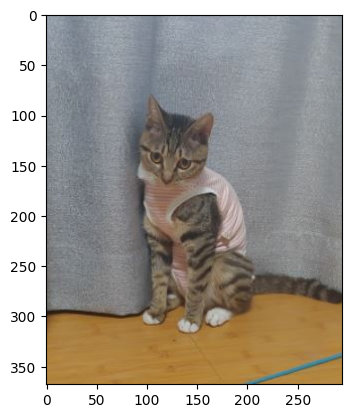

In [4]:
# 이미지 보기
def cv_image_read(image_path):
    print(image_path)
    return cv2.imread(image_path)

def show_image(cv_image):
    rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb)
    plt.show()

show_image(cv_image_read('./cat_2.jpg'))


In [5]:
# Torchvision 데이터세트 클래스
class TorchvisionDataset(Dataset):
    # __init__은 객체가 생성될 때 한 번 실행 됨
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels #해당하는 레이블(정답)을 리스트 형태로 저장
        self.transform = transform #데이터 전처리, 데이터 증강을 위한 변환 정의
    
    def __len__(self): #데이터의 전체 크기, 이미지 파일의 수
        return len(self.file_paths) #데이터셋의 길이를 자동으로 계산
    
    # 특정 인덱스 반환
    def __getitem__(self, idx):
        label = self.labels[idx] #정답
        file_path = self.file_paths[idx] #이미지 경로
        # 이미지 읽기
        image = Image.open(file_path)
        # 이미지 변경 수행
        # transform이 지정되어 있으면 읽어온 이미지에 적용
        if self.transform:
            image = self.transform(image)
        return image, label

In [6]:
# Torchvision 이미지 변형 (사이즈 변경, 자르기, 수평 뒤집기)
# 여러 변환을 구성해 하나의 변환으로 만들어줌 (순차적으로 적용)
torchvision_transform = transforms.Compose([
    transforms.Resize((200, 220)), #resize
    transforms.RandomCrop(120), #무작위로 자르기
    transforms.RandomHorizontalFlip(), #일정 확률(기본값 0.5)로 이미지를 수평으로 뒤집음 => 이미지의 방향에 덜 민감하게 만들어줌
    transforms.ToTensor(), # 이미지 데이터를 PyTorch 텐서로 변환. 픽셀 값[0, 255]가 [0.0, 1.0]으로 정규화
])
# TorchvisionDataset 클래스 객체 생성
torchvision_dataset = TorchvisionDataset(
    file_paths=['./cat_2.jpg'], #이미지 경로 (리스트 형식)
    labels=[1], #해당 라벨 (리스트 형식)
    transform=torchvision_transform, #설정한 변환 매개변수
)

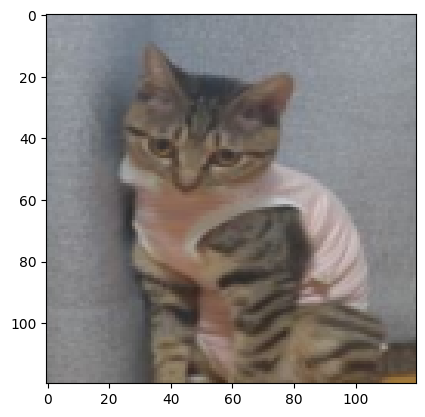

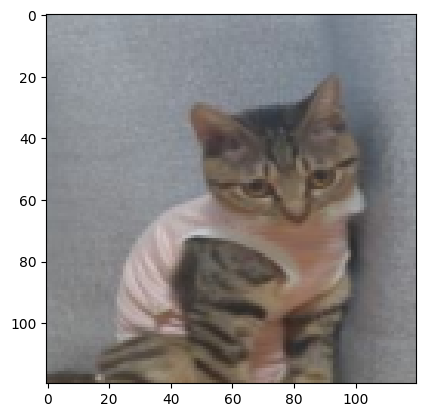

In [20]:
# 랜덤으로 2번 변형 수행
for i in range(2):
    sample, _ = torchvision_dataset[0] #sample = 고양이, _ = label
    plt.figure()
    plt.imshow(transforms.ToPILImage()(sample)) #ToPILImage ->텐서 형태의 이미지 데이터를 PIL(Python Image Libraryfh로 변환)
    plt.show()

### Albumentations 패키지를 이용한 데이터 증강

In [ ]:
# 에러남
# pip install albumentations

In [ ]:
# 이렇게 설치하면 에러 안 남
# pip install albumentations --user

In [19]:
import albumentations
import albumentations.pytorch

In [40]:
# Albumentations 데이터세트 클래스
class AlbumentationsDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        # 이미지 읽기
        image = cv2.imread(file_path)
        # BGR opencv 이미지를 RGB 이미지로 변경
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # 이미지 변경 수행
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image, label

In [42]:
# albumentations 이미지 변형 (사이즈 변경, 자르기, 90도 회전, 수평 뒤집기, 가우시안 노이즈)
albumentations_transform = albumentations.Compose([
    albumentations.Resize(220, 220),
    albumentations.RandomCrop(120, 120),
    albumentations.RandomRotate90(p=1),
    albumentations.HorizontalFlip(),
    albumentations.GaussNoise(p=1),
    albumentations.pytorch.transforms.ToTensorV2()
])
# AlbumentationsDataset 클래스 객체 생성
albumentations_dataset = AlbumentationsDataset(
    file_paths=['./cat_2.jpg'],
    labels=[1],
    transform=albumentations_transform,
)

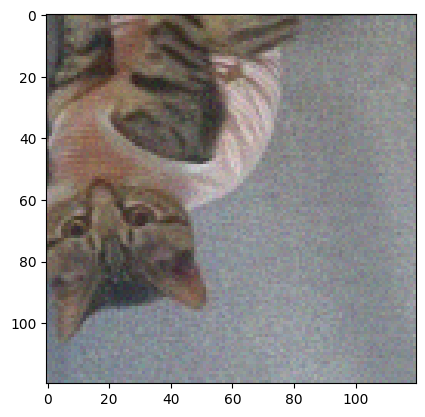

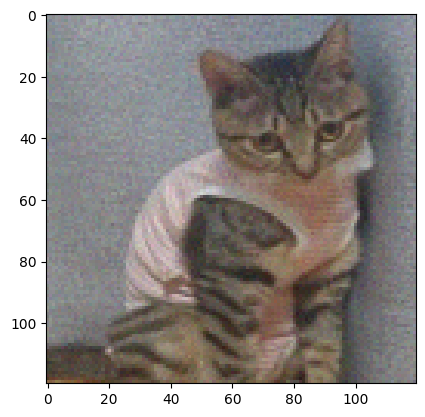

In [43]:
for i in range(2):
    sample, _ = albumentations_dataset[0]

    plt.figure()
    plt.imshow(transforms.ToPILImage()(sample))
    plt.show()